In [9]:
import numpy as np
import pandas as pd
data = np.array([[0,2,0,0],[0,1,4,0],[0,1,1,0]])
data_raw = pd.DataFrame({'Column1': data[:,0], 'Column2': data[:,1], 'Column3': data[:,2], 'Column4': data[:,3]})
data_raw

,Column1,Column2,Column3,Column4
0,0,2,0,0
1,0,1,4,0
2,0,1,1,0


In [10]:
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
# normalize the data attributes
normalized = preprocessing.normalize(data)
dataset = pd.DataFrame({'Column1': normalized[:,0], 'Column2': normalized[:,1], 'Column3': normalized[:,2], 'Column4': normalized[:,3]})
dataset

,Column1,Column2,Column3,Column4
0,0.0,1.000000,0.000000,0.0
1,0.0,0.242536,0.970143,0.0
2,0.0,0.707107,0.707107,0.0


In [11]:
selector = VarianceThreshold()
featureSelected = selector.fit_transform(normalized)
print(featureSelected)
dataset = pd.DataFrame({'Column2': normalized[:,1], 'Column3': normalized[:,2]})
dataset

[[1.         0.        ]
 [0.24253563 0.9701425 ]
 [0.70710678 0.70710678]]


,Column2,Column3
0,1.000000,0.000000
1,0.242536,0.970143
2,0.707107,0.707107


In [13]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into pandas dataframe
df = pd.read_csv(url, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# separating out features
x = df.loc[:,features].values
# separating out target
y = df.loc[:,['target']].values
# Stadndardizing features
x = StandardScaler().fit_transform(x)
xdf = pd.DataFrame({'sepal length': x[:,0], 'sepal width': x[:,1], 'petal length': x[:,2], 'petal width': x[:,3], 'target':y[:,0]})
xdf

,sepal length,sepal width,petal length,petal width,target
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,Iris-virginica
146,0.553333,-1.281972,0.705893,0.922064,Iris-virginica
147,0.795669,-0.124958,0.819624,1.053537,Iris-virginica
148,0.432165,0.800654,0.933356,1.447956,Iris-virginica


In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [19]:
finalDf = pd.concat([principalDf, df['target']], axis=1)
finalDf

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


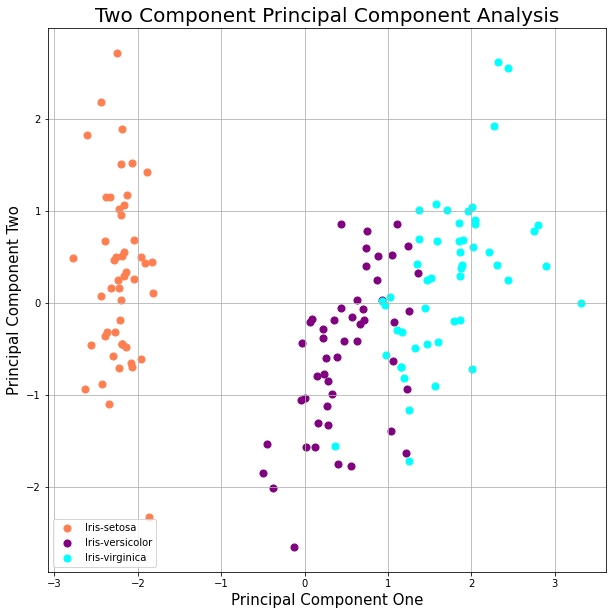

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component One', fontsize=15)
ax.set_ylabel('Principal Component Two', fontsize=15)
ax.set_title('Two Component Principal Component Analysis', fontsize=20)
targets = ['Iris-setosa','Iris-versicolor','Iris-virginica']
colors = ['coral','purple','aqua']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c = color,
               s = 50)
ax.legend(targets)
ax.grid()

In [22]:
variance_ratio = pca.explained_variance_ratio_
variance_ratio

array([0.72770452, 0.23030523])

In [23]:
total_variance = variance_ratio[0] + variance_ratio[1]
total_variance

0.9580097536148197